<a href="https://colab.research.google.com/github/sweetyjunnarkar/Recommend_Book/blob/main/Sweety_Junnarkar_Capstone_Project_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

**Content**

The Book-Crossing dataset comprises 3 files.

● **Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● **Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● **Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
users_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 6/Week 1/Book Recommendation System/data/Users.csv")

In [ ]:
users_df.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users_df['City'] = users_df['Location'].str.split(',').apply(lambda x: x[0])
users_df['Country'] = users_df['Location'].str.split(',').apply(lambda x: x[-1])

In [ ]:
users_df

,User-ID,Location,Age,City,Country
0,1,"nyc, new york, usa",NaN,nyc,usa
1,2,"stockton, california, usa",18.0,stockton,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,united kingdom
...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,usa


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
 3   City      278858 non-null  object 
 4   Country   278858 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.6+ MB


In [ ]:
users_df.isnull().sum()

User-ID          0
Location         0
Age         110762
City             0
Country          0
dtype: int64

In [ ]:
users_df.describe(include="all")

,User-ID,Location,Age,City,Country
count,278858.00000,278858,168096.000000,278858,278858
unique,NaN,57339,NaN,32770,709
top,NaN,"london, england, united kingdom",NaN,london,usa
freq,NaN,2506,NaN,4105,139711
mean,139429.50000,NaN,34.751434,NaN,NaN
std,80499.51502,NaN,14.428097,NaN,NaN
min,1.00000,NaN,0.000000,NaN,NaN
25%,69715.25000,NaN,24.000000,NaN,NaN
50%,139429.50000,NaN,32.000000,NaN,NaN
75%,209143.75000,NaN,44.000000,NaN,NaN


In [ ]:
books_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 6/Week 1/Book Recommendation System/data/Books.csv",low_memory=False)

In [ ]:
books_df.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
books_df.loc[books_df.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
books_df["Book-Author"].fillna("David Tait", inplace=True)

In [ ]:
books_df['Book-Author'].loc[187689]

'David Tait'

In [ ]:
books_df["Publisher"].fillna("Novelbooks Inc", inplace=True)

In [ ]:
books_df.loc[128890]

ISBN                                                          193169656X
Book-Title                                                   Tyrant Moon
Book-Author                                              Elaine Corvidae
Year-Of-Publication                                                 2002
Publisher                                                 Novelbooks Inc
Image-URL-S            http://images.amazon.com/images/P/193169656X.0...
Image-URL-M            http://images.amazon.com/images/P/193169656X.0...
Image-URL-L            http://images.amazon.com/images/P/193169656X.0...
Name: 128890, dtype: object

In [ ]:
books_df["Publisher"].loc[129037]="Bantam"

In [ ]:
books_df.loc[129037]

ISBN                                                          1931696993
Book-Title                                               Finders Keepers
Book-Author                                              Linnea Sinclair
Year-Of-Publication                                                 2001
Publisher                                                         Bantam
Image-URL-S            http://images.amazon.com/images/P/1931696993.0...
Image-URL-M            http://images.amazon.com/images/P/1931696993.0...
Image-URL-L            http://images.amazon.com/images/P/1931696993.0...
Name: 129037, dtype: object

In [ ]:
ratings_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 6/Week 1/Book Recommendation System/data/Ratings.csv")

In [ ]:
ratings_df.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings_df.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


In [ ]:
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

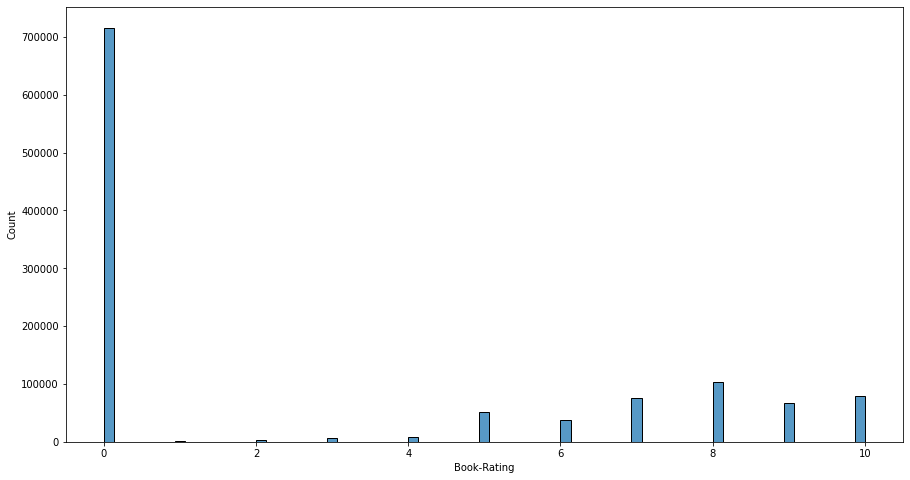

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=ratings_df,x='Book-Rating')

In [ ]:
ratings_df.drop_duplicates()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
users_df.drop_duplicates()

,User-ID,Location,Age,City,Country
0,1,"nyc, new york, usa",NaN,nyc,usa
1,2,"stockton, california, usa",18.0,stockton,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,united kingdom
...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,usa


In [ ]:
books_df.drop_duplicates()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
df1 = pd.merge(ratings_df, books_df, on="ISBN",how='inner')

In [ ]:
df1.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031136 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031136 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(2), object(8)
memory usage: 86.5+ MB


In [ ]:
df1.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
dtype: int64

In [ ]:
df1.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [ ]:
final_df=pd.merge(df1,users_df,on='User-ID',how='inner')

In [ ]:
final_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,City,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN,tyler,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0,cincinnati,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0,cincinnati,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0,cincinnati,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0,cincinnati,usa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,"genève, genève, switzerland",62.0,genève,switzerland
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,"stuttgart, \n/a\""., germany""",NaN,stuttgart,"germany"""
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,"arlington heights, illinois, usa",13.0,arlington heights,usa
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,"arlington heights, illinois, usa",13.0,arlington heights,usa


In [ ]:
final_df.drop(['Location','Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [ ]:
final_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,NaN,tyler,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23.0,cincinnati,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23.0,cincinnati,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23.0,cincinnati,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23.0,cincinnati,usa
...,...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,62.0,genève,switzerland
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,NaN,stuttgart,"germany"""
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,13.0,arlington heights,usa
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,13.0,arlington heights,usa


In [ ]:
print('Total books: ', final_df['ISBN'].nunique())

Total books:  270151


In [ ]:
print('Total users: ',final_df['User-ID'].nunique())

Total users:  92106


In [ ]:
print('Number of outliers: ', sum(final_df['Age'] > 100) and sum(final_df['Age']<15))

Number of outliers:  10579


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


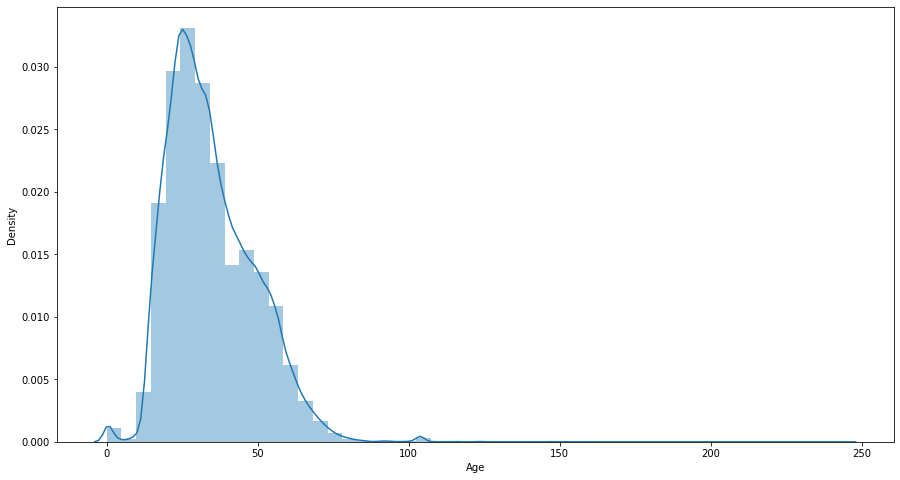

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(users_df['Age'])

In [ ]:
final_df['Book-Rating'] = final_df['Book-Rating'].replace(0, None)

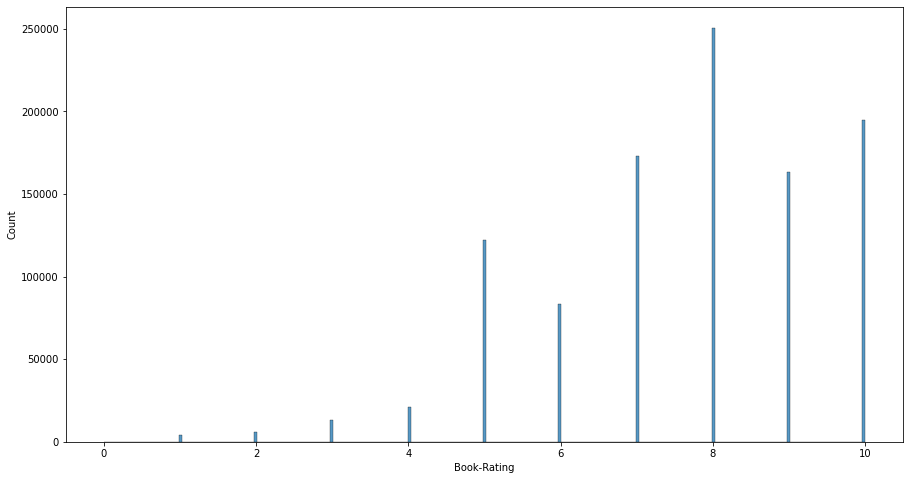

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=final_df,x='Book-Rating')

In [ ]:
final_df['Year-Of-Publication'].unique()

array(['2002', '1986', '1994', '1996', '1998', '2001', '1987', '1984',
       '1997', '1970', '1978', '1993', '1989', '1995', '1990', '1992',
       '1950', '1991', '1999', '1954', '1988', '2003', '2004', '2000',
       '1983', '1985', '1982', '1956', '1979', '1975', '0', '1976',
       '1981', '1977', '1980', '1974', '1957', '1958', '1960', '1963',
       '1969', '1972', '1961', '1971', '1953', '1968', '1973', '1967',
       '1962', '1937', '1959', '1955', '1946', '2005', '1945', '1965',
       '1964', '1927', '2020', '2050', '1920', '1966', '1952', '1930',
       '1940', '1942', '1947', '1925', '1948', '1923', '2030', '1951',
       '2021', '1941', '1932', '2011', '1901', '2038', '1929', '1943',
       '1936', 'DK Publishing Inc', '1928', '1939', '1944', '1938',
       '1902', '1900', '1911', '1949', '1906', '1806', '1933', '1935',
       '1926', '1922', '1897', '2026', '2006', '2037', '1924', '1921',
       '2024', 'Gallimard', '1378', '2008', '2010', '1934', '1909',
       '1931', 

In [ ]:
final_df[final_df['Year-Of-Publication']=='DK Publishing Inc']

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Country
85425,130571,0789466953,8,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,NaN,summerville,usa
346284,227771,078946697X,7,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,19.0,savion,israel
594299,169663,078946697X,10,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,NaN,towson,usa


In [ ]:
final_df[final_df['Year-Of-Publication']=='Gallimard']

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Country
402556,137190,2070426769,7,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,31.0,rennes,france


In [ ]:
#books_df["Publisher"].loc[129037]="Bantam"

In [ ]:
final_df['Year-Of-Publication']

0          2002
1          2002
2          1986
3          1994
4          1996
           ... 
1031131    2002
1031132    1984
1031133    2001
1031134    1998
1031135    1985
Name: Year-Of-Publication, Length: 1031136, dtype: object

In [ ]:
final_df['Year-Of-Publication'].loc[85425]=0
final_df['Year-Of-Publication'].loc[346284]=0
final_df['Year-Of-Publication'].loc[594299]=0
final_df['Year-Of-Publication'].loc[402556]=0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
final_df['Year-Of-Publication']=pd.to_numeric(final_df['Year-Of-Publication'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


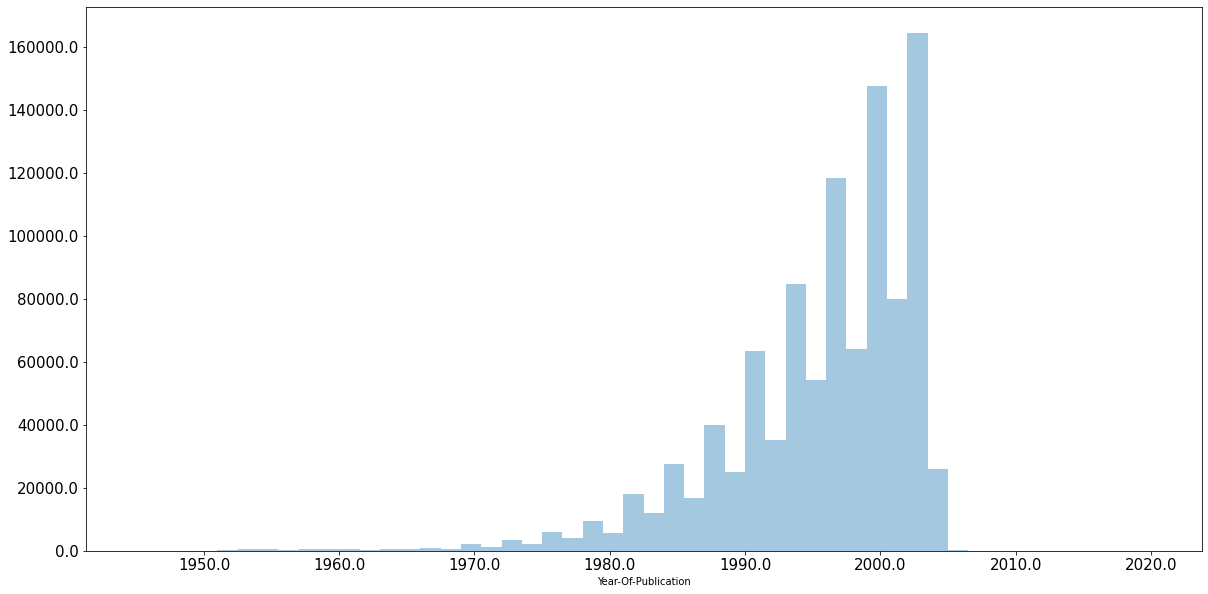

In [ ]:
plt.figure(figsize=(20,10))
b=sns.distplot(final_df['Year-Of-Publication'],kde=False,hist_kws={"range": [1945,2020]})
b.set_yticklabels(b.get_yticks(), size = 15)
b.set_xticklabels(b.get_xticks(), size = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


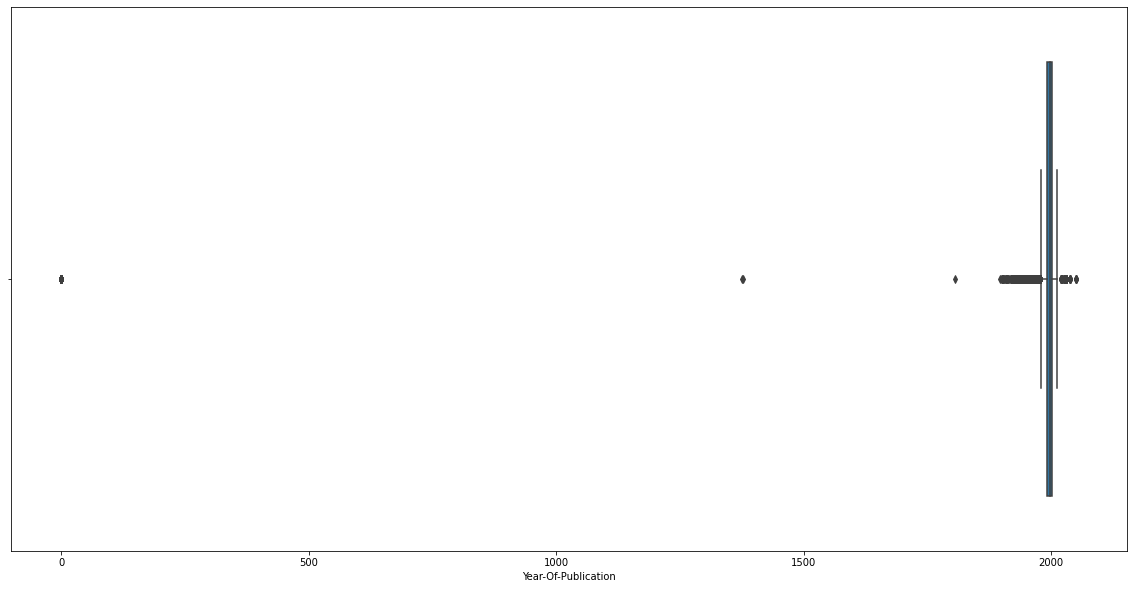

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(final_df['Year-Of-Publication'])

In [ ]:
final_df=final_df[final_df['Year-Of-Publication']<=2020]

In [ ]:
final_df=final_df[final_df['Year-Of-Publication']>=1980]

In [ ]:
final_df.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,NaN,tyler,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23.0,cincinnati,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23.0,cincinnati,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23.0,cincinnati,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23.0,cincinnati,usa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


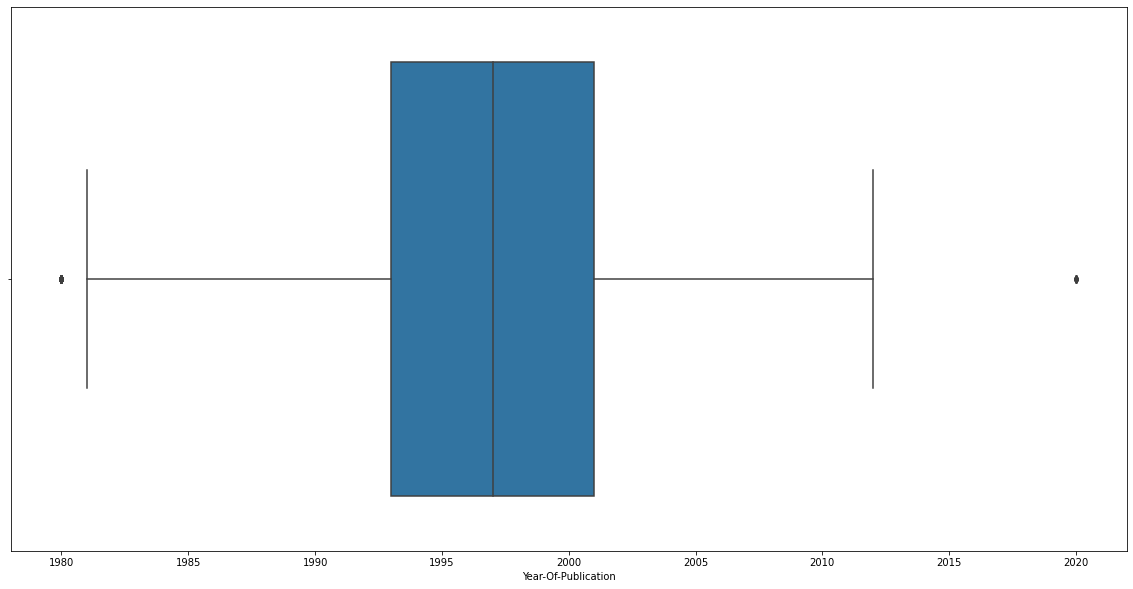

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(final_df['Year-Of-Publication'])

In [ ]:
final_df['Age'].median()

35.0

In [ ]:
final_df['Age']=np.where(final_df['Age']>=90,35,final_df['Age'])

In [ ]:
final_df['Age'].unique()

array([nan, 23., 34.,  2., 45., 24., 36., 35., 51., 39., 52., 72., 30.,
       46., 41., 33., 29., 21., 38., 63., 26., 59., 44.,  1., 25., 54.,
       27., 28., 16., 20., 17., 56., 32., 61., 53., 31., 40., 37., 43.,
       50., 15., 19., 49., 47., 60., 69., 42., 22., 18., 64., 58., 68.,
       48., 14., 62., 71., 57.,  9., 67., 55.,  0., 66., 13., 75., 70.,
       65., 83., 11., 10., 12.,  8., 76., 73., 80., 79.,  7., 74.,  3.,
       77., 85., 82., 81., 84., 78.,  5.,  4., 86., 89.,  6.])

In [ ]:
final_df['Age']=final_df['Age'].fillna(35)

In [ ]:
final_df.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Age                    0
City                   0
Country                0
dtype: int64